Merging three csv files

In [82]:
# importing required libraries
import os
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.special import expit

In [83]:
import sys
from google.colab import drive
# This mouunts google drive to the current runtime
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [84]:
#read loan.csv file
dfori = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/loan.csv')

In [85]:
#making a copy of the dataframe from original dataframe
df = dfori.copy()

In [86]:
df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [87]:
df.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF'],
      dtype='object')

In [88]:
#dropping not required elements
df.drop(['apr','applicationDate','originatedDate', 'originallyScheduledPaymentAmount', 'state','leadCost'],axis = 1, inplace = True)

In [89]:
df

,loanId,anon_ssn,payFrequency,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,leadType,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,False,0.0,False,0,Withdrawn Application,500.0,bvMandatory,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,True,0.0,True,1,Paid Off Loan,3000.0,prescreen,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,False,0.0,False,0,Withdrawn Application,400.0,bvMandatory,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,False,0.0,False,0,Withdrawn Application,500.0,bvMandatory,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,False,0.0,False,0,Rejected,350.0,bvMandatory,NaN,5754a91be4b0c6a2bf424772,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577677,LL-I-12122269,801262d04720d32040612759857f4147,B,False,0.0,False,0,Withdrawn Application,400.0,bvMandatory,NaN,58220cdde4b051c58d919c1f,1
577678,LL-I-16183462,e37750de9d99a67e0fa96a51e86fdf5b,S,False,0.0,False,0,Withdrawn Application,1000.0,lead,NaN,5887d349e4b08f249ac45e2f,1
577679,LL-I-06962710,d7e55e85266208ac4c353f42ebcde5ca,B,False,0.0,False,0,Withdrawn Application,300.0,bvMandatory,NaN,550b1f59e4b0d4592e28c84e,1
577680,LL-I-01253468,c3b35307cb36116bf59574f9138d3dad,B,False,0.0,False,0,Withdrawn Application,300.0,organic,NaN,NaN,0


In [90]:
#read clarity_underwriting_variables.csv file
uwori = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/clarity_underwriting_variables.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [91]:
#making a copy of the dataframe from original dataframe
uw = uwori.copy()

In [92]:
uw.head()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


In [93]:
uw.columns

Index(['.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentw

In [94]:
#obtain the rows and columns from the csv file
uw.shape

(49752, 54)

In [95]:
#drop unnecessary columns
uw.drop(uw.columns[:52],axis = 1, inplace = True)

In [96]:
#renaming column name
uw.rename(columns = {'underwritingid':'clarityFraudId'}, inplace = True)

In [97]:
#merged the two csv files together with the left being the main file
merged = pd.merge(left = df, right = uw, how = "left", left_on = "clarityFraudId", right_on = "clarityFraudId")

In [98]:
merged.head(20)

,loanId,anon_ssn,payFrequency,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,leadType,fpStatus,clarityFraudId,hasCF,clearfraudscore
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,False,0.0,False,0,Withdrawn Application,500.0,bvMandatory,NaN,5669ef78e4b0c9d3936440e6,1,NaN
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,True,0.0,True,1,Paid Off Loan,3000.0,prescreen,Checked,569eb3a3e4b096699f685d64,1,879.0
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,False,0.0,False,0,Withdrawn Application,400.0,bvMandatory,NaN,579eab11e4b0d0502870ef2f,1,NaN
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,False,0.0,False,0,Withdrawn Application,500.0,bvMandatory,NaN,555b1e95e4b0f6f11b267c18,1,NaN
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,False,0.0,False,0,Rejected,350.0,bvMandatory,NaN,5754a91be4b0c6a2bf424772,1,NaN
5,LL-I-09734486,b5541f49472fa0fce8e473306768f7fb,M,False,0.0,False,0,Withdrawn Application,300.0,organic,NaN,574e2029e4b061d2c3a16a4c,1,NaN
6,LL-I-15006968,1828c64bb2dffeae88b27174a9f79ecc,B,False,0.0,False,0,Withdrawn Application,400.0,lead,NaN,5877c533e4b08f2480ab7e5a,1,NaN
7,LL-I-08327946,02596517e7633c7e87e6b333a0fb1bbe,M,False,0.0,False,0,Withdrawn Application,350.0,bvMandatory,NaN,NaN,0,NaN
8,LL-I-10568307,523ed92e1145eb688bb631da24695197,S,False,0.0,False,0,Withdrawn Application,2600.0,california,NaN,5797fe22e4b0d05020f298ce,1,NaN
9,LL-I-05518977,47bf79119075e41ef65510f2900c8e4a,B,False,0.0,False,0,Withdrawn Application,500.0,bvMandatory,NaN,563281d2e4b07887adc5bc0a,1,NaN


In [99]:
#information from the csv files
merged.describe()

,nPaidOff,isFunded,loanAmount,hasCF,clearfraudscore
count,577658.000000,577682.000000,575432.000000,577682.000000,36225.000000
mean,0.037887,0.067480,514.245084,0.619187,687.409634
std,0.333366,0.250852,320.939929,0.485587,127.032664
min,0.000000,0.000000,0.000000,0.000000,122.000000
25%,0.000000,0.000000,350.000000,0.000000,596.000000
50%,0.000000,0.000000,500.000000,1.000000,696.000000
75%,0.000000,0.000000,500.000000,1.000000,787.000000
max,21.000000,1.000000,5000.000000,1.000000,965.000000


In [100]:
#read payment.csv file
py = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/payment.csv')

In [101]:
#select the loandId column as a new dataframe
pysub = py[['loanId']]

In [102]:
#drop any duplicates
pysub = pysub.drop_duplicates()

In [103]:
#obtain the loanId from the df dataframe and name it as a new dataframe
pytotal = df[['loanId']]

In [104]:
#drop null values
pytotal = pytotal.dropna()

In [105]:
#assign the value 1 if the number exist in both dataframe
#call this column errorPaymentExist, meaning there exist at least a rejected in the payment status
pycheck = pytotal.assign(errorPaymentExist=pysub['loanId'].isin(pytotal['loanId']).astype(int))

In [106]:
#fill the Nan values with -1
pycheck['errorPaymentExist'] = pycheck['errorPaymentExist'].fillna(-1)

In [107]:
#obtain the count of unique values
pycheck['errorPaymentExist'].value_counts()

-1.0    544776
 1.0     32650
Name: errorPaymentExist, dtype: int64

In [108]:
#merged the two csv files together with the left being the main file
totalmerged = pd.merge(left = merged, right = pycheck, how = "left", left_on = "loanId", right_on = "loanId")

In [109]:
totalmerged.to_csv('MergeData.csv',encoding='utf-8', index=False)

Analysis

In [110]:
#make a copy from the original dataframe
analysis = totalmerged.copy()

In [111]:
#select data with analysis['originated'] = True to exclue applicants that did not have underwriting
analysis = analysis[(analysis['originated'] == True)]

In [112]:
#convert boolean values to integer
analysis["originated"] = analysis["originated"].astype(int)

In [113]:
#convert boolean values to integer
analysis["approved"] = analysis["approved"].astype(int)

In [114]:
#filter only external loan, internal loan and paid off in the loan status
analysis = analysis.loc[(analysis['loanStatus'] == 'External Collection') | (analysis['loanStatus'] == 'Internal Collection') | (analysis['loanStatus'] == 'Paid Off Loan')]

In [115]:
#replace the loan Status value
analysis['loanStatus'] = analysis['loanStatus'].replace({'Paid Off Loan' : 1,'Internal Collection' : 0,'External Collection': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
analysis['loanStatus'] = analysis['loanStatus'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
analysis.dtypes

loanId                object
anon_ssn              object
payFrequency          object
originated             int64
nPaidOff             float64
approved               int64
isFunded               int64
loanStatus             int64
loanAmount           float64
leadType              object
fpStatus              object
clarityFraudId        object
hasCF                  int64
clearfraudscore      float64
errorPaymentExist    float64
dtype: object

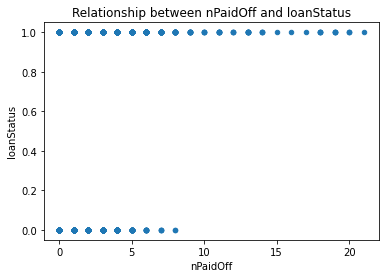

In [118]:
#plot the scatter plot
analysis[['nPaidOff','loanStatus']].plot(title = 'Relationship between nPaidOff and loanStatus' ,kind = 'scatter', x = 'nPaidOff', y = 'loanStatus')

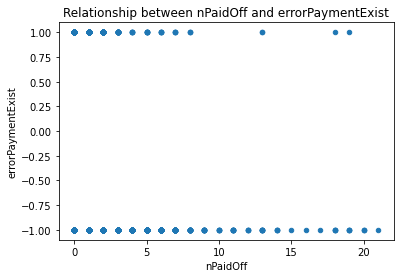

In [119]:
#plot the scatter plot
analysis[['nPaidOff','errorPaymentExist']].plot(title = 'Relationship between nPaidOff and errorPaymentExist' ,kind = 'scatter', x = 'nPaidOff', y = 'errorPaymentExist')

In [120]:
#get the crosstabResults
CrosstabResult=pd.crosstab(index=analysis['nPaidOff'],columns=analysis['loanStatus'])
print (CrosstabResult)

loanStatus      0     1
nPaidOff               
0.0         14832  7754
1.0          1504  2224
2.0           357   744
3.0           110   315
4.0            43   151
5.0            23    80
6.0             9    51
7.0             4    29
8.0             2    17
9.0             0    10
10.0            0     5
11.0            0     8
12.0            0     4
13.0            0     9
14.0            0     4
15.0            0     1
16.0            0     1
17.0            0     1
18.0            0     5
19.0            0     5
20.0            0     3
21.0            0     1


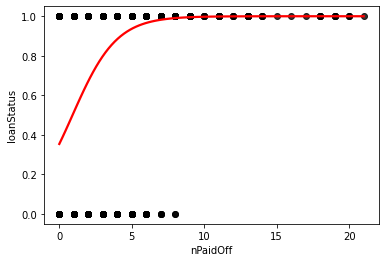

In [121]:
#run a simple logistic regression on two features
#we can see that the approved is high if there is at least one loan the client
#has paid off in the past
x = analysis['nPaidOff']
y = analysis['loanStatus']
sns.regplot(x=x, y=y, data=analysis, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

In [122]:
#obtain a new dataframe from a subset of columns from the analysis dataframe
analysisfraudscore = analysis[['clearfraudscore', 'loanStatus']]

In [123]:
#drop NaN elements
analysisfraudscore = analysisfraudscore.dropna()

In [124]:
analysisfraudscore

,clearfraudscore,loanStatus
1,879.0,1
47,835.0,1
54,624.0,1
64,770.0,1
83,932.0,0
...,...,...
577504,596.0,1
577505,925.0,1
577590,700.0,1
577617,806.0,1


In [125]:
#identigy the counts of unique elements for the approved column
analysisfraudscore['loanStatus'].value_counts()

0    14416
1     9062
Name: loanStatus, dtype: int64

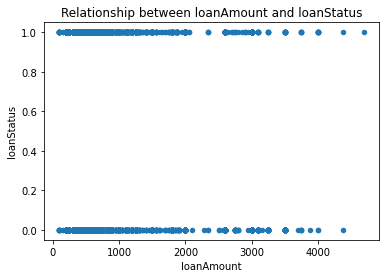

In [126]:
analysis[['loanAmount','loanStatus']].plot(title = 'Relationship between loanAmount and loanStatus',kind = 'scatter', x = 'loanAmount', y = 'loanStatus')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f544c91aa90>,
      dtype=object)

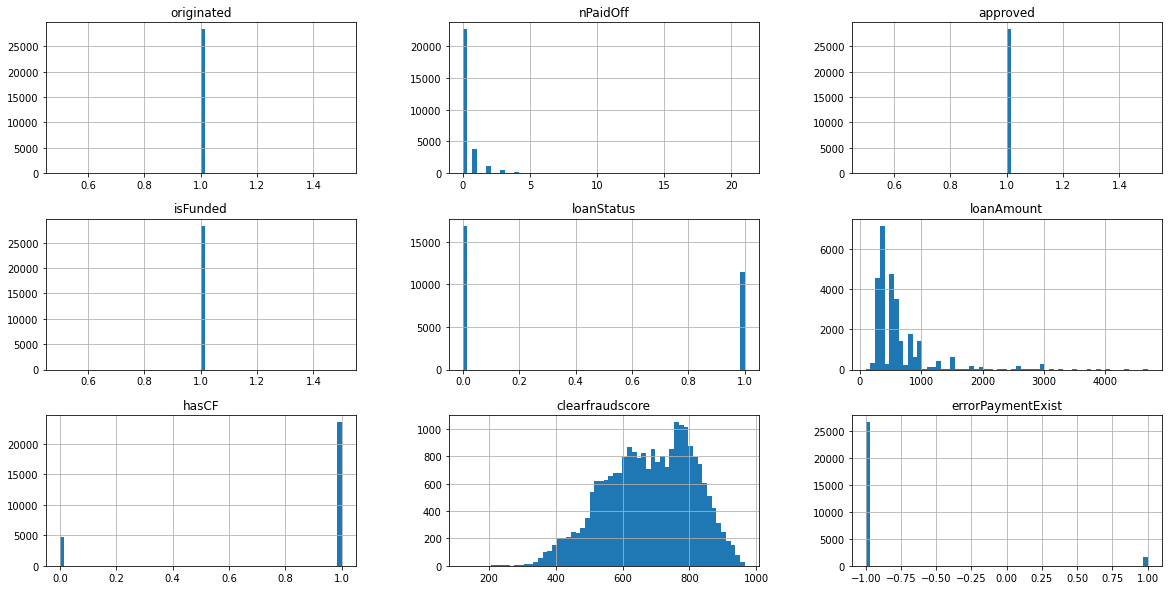

In [127]:
#display the histogram for the dataframe
analysis.hist(bins = 60, figsize = (20,10))

In [128]:
#drop NaN values
analysispaymenterror = analysis[['loanStatus', 'errorPaymentExist']]
analysispaymenterror = analysispaymenterror.dropna()

In [129]:
#identify the count of unique values for approved column
analysispaymenterror['loanStatus'].value_counts()

0    16898
1    11427
Name: loanStatus, dtype: int64

In [130]:
#identify the count of unique values for errorPaymentExist column
analysispaymenterror['errorPaymentExist'].value_counts()

-1.0    26710
 1.0     1615
Name: errorPaymentExist, dtype: int64

In [131]:
#display the crosstab results
CrosstabResult=pd.crosstab(index=analysispaymenterror['errorPaymentExist'],columns=analysispaymenterror['loanStatus'])
print (CrosstabResult)

loanStatus             0      1
errorPaymentExist              
-1.0               15904  10806
 1.0                 994    621


In [132]:
#display the crosstab results
CrosstabResult=pd.crosstab(index=analysis['nPaidOff'],columns=analysis['loanStatus'])
print (CrosstabResult)

loanStatus      0     1
nPaidOff               
0.0         14832  7754
1.0          1504  2224
2.0           357   744
3.0           110   315
4.0            43   151
5.0            23    80
6.0             9    51
7.0             4    29
8.0             2    17
9.0             0    10
10.0            0     5
11.0            0     8
12.0            0     4
13.0            0     9
14.0            0     4
15.0            0     1
16.0            0     1
17.0            0     1
18.0            0     5
19.0            0     5
20.0            0     3
21.0            0     1


In [133]:
#display the crosstab results
CrosstabResult=pd.crosstab(index=analysis['fpStatus'],columns=analysis['loanStatus'])
print (CrosstabResult)

loanStatus      0      1
fpStatus                
Cancelled      32    196
Checked     11923  10962
Rejected     4833    219
Returned        1      0
Skipped       101     50


In [134]:
#filter rows that paid off Loan in the loan status
analysisPaidOffLoan = analysis.loc[(analysis['loanStatus'] == 1)]

In [135]:
#filter rows that have either external collection or internal collection
analysisCollectionLoan = analysis.loc[(analysis['loanStatus'] == 0)]

In [136]:
#reset index and drop NaN rows
analysisCollectionLoan = analysisCollectionLoan.reset_index()
analysisCollectionLoan1 = analysisCollectionLoan.dropna(subset=['clearfraudscore'])

In [137]:
#reset index and drop NaN rows
analysisLoan = analysis.loc[(analysis['loanStatus'] == 0) | (analysis['loanStatus'] == 1)]
analysisLoan = analysisLoan.reset_index()
analysisLoan1 = analysisLoan.dropna(subset=['clearfraudscore'])

In [138]:
analysisPaidOffLoan

,loanId,anon_ssn,payFrequency,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,leadType,fpStatus,clarityFraudId,hasCF,clearfraudscore,errorPaymentExist
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,1,0.0,1,1,1,3000.0,prescreen,Checked,569eb3a3e4b096699f685d64,1,879.0,-1.0
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,1,2.0,1,1,1,1250.0,organic,Checked,58450a15e4b0bb9d6d7344c7,1,835.0,-1.0
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,1,0.0,1,1,1,800.0,bvMandatory,Checked,578f9346e4b0810ad5e7b72e,1,624.0,-1.0
64,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,W,1,3.0,1,1,1,300.0,organic,Checked,56621584e4b0100e84141586,1,770.0,-1.0
98,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,W,1,0.0,1,1,1,300.0,bvMandatory,Rejected,NaN,0,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577505,LL-I-15390953,c81e355845a451b77c29b6515efa2578,B,1,0.0,1,1,1,1500.0,lead,Checked,587c527ce4b08f2487e808ba,1,925.0,1.0
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,1,3.0,1,1,1,600.0,rc_returning,Checked,NaN,0,NaN,-1.0
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,1,0.0,1,1,1,375.0,lead,Checked,587a7f49e4b08f2485d48358,1,700.0,-1.0
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,1,0.0,1,1,1,400.0,lead,Checked,5769e592e4b0ab6c50364d45,1,806.0,-1.0


In [139]:
#reset index
analysisPaidOffLoan = analysisPaidOffLoan.reset_index()

In [140]:
#drop NaN elements and have it as a new dataframe
analysisPaidOffLoan1 = analysisPaidOffLoan.dropna(subset=['clearfraudscore'])

In [141]:
analysisPaidOffLoan1

,index,loanId,anon_ssn,payFrequency,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,leadType,fpStatus,clarityFraudId,hasCF,clearfraudscore,errorPaymentExist
0,1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,1,0.0,1,1,1,3000.0,prescreen,Checked,569eb3a3e4b096699f685d64,1,879.0,-1.0
1,47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,1,2.0,1,1,1,1250.0,organic,Checked,58450a15e4b0bb9d6d7344c7,1,835.0,-1.0
2,54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,1,0.0,1,1,1,800.0,bvMandatory,Checked,578f9346e4b0810ad5e7b72e,1,624.0,-1.0
3,64,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,W,1,3.0,1,1,1,300.0,organic,Checked,56621584e4b0100e84141586,1,770.0,-1.0
5,186,LL-I-04577739,edac6e371cda7512214ba74698247a19,B,1,0.0,1,1,1,600.0,lead,Checked,557716a4e4b0a648a068ade3,1,818.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11421,577504,LL-I-05352479,c54fe4772636b36b0727b735b85d0254,W,1,0.0,1,1,1,600.0,bvMandatory,Checked,56630dfee4b0100e8495f049,1,596.0,-1.0
11422,577505,LL-I-15390953,c81e355845a451b77c29b6515efa2578,B,1,0.0,1,1,1,1500.0,lead,Checked,587c527ce4b08f2487e808ba,1,925.0,1.0
11424,577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,1,0.0,1,1,1,375.0,lead,Checked,587a7f49e4b08f2485d48358,1,700.0,-1.0
11425,577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,1,0.0,1,1,1,400.0,lead,Checked,5769e592e4b0ab6c50364d45,1,806.0,-1.0


In [142]:
#display a descriptive statistic
analysisPaidOffLoan1.describe()

,index,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,hasCF,clearfraudscore,errorPaymentExist
count,9062.000000,9062.0,9061.000000,9062.0,9062.0,9062.0,9062.000000,9062.0,9062.000000,9062.000000
mean,288469.430258,1.0,0.329544,1.0,1.0,1.0,655.936990,1.0,716.018429,-0.888104
std,166686.169300,0.0,0.883874,0.0,0.0,0.0,478.304485,0.0,129.279369,0.459668
min,1.000000,1.0,0.000000,1.0,1.0,1.0,100.000000,1.0,177.000000,-1.000000
25%,143491.750000,1.0,0.000000,1.0,1.0,1.0,400.000000,1.0,626.000000,-1.000000
50%,289403.500000,1.0,0.000000,1.0,1.0,1.0,500.000000,1.0,745.000000,-1.000000
75%,431865.750000,1.0,0.000000,1.0,1.0,1.0,750.000000,1.0,815.000000,-1.000000
max,577662.000000,1.0,20.000000,1.0,1.0,1.0,4687.000000,1.0,961.000000,1.000000


In [143]:
#display a descriptive statistic excluding numeric columns
analysisPaidOffLoan1.describe(exclude = 'number')

,loanId,anon_ssn,payFrequency,leadType,fpStatus,clarityFraudId
count,9062,9062,9062,9062,9062,9062
unique,9062,7895,5,10,4,8217
top,LL-I-06644937,228060b9cc8af6a937d0321122d459f3,B,bvMandatory,Checked,57b589afe4b0104a27f024d1
freq,1,10,5333,3787,8729,6


In [144]:
#display the crosstable results
CrosstabResult=pd.crosstab(index=analysisPaidOffLoan['fpStatus'],columns=analysis['loanStatus'])
print (CrosstabResult)

loanStatus    0    1
fpStatus            
Cancelled     8    1
Checked     309  210
Rejected      4    2
Skipped       1    1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

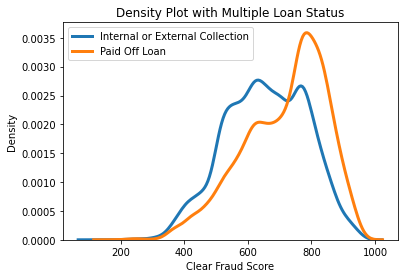

In [145]:
#display the density plot for two different loanStatus and their relative Clear Fraud Score
subset = analysisLoan1[analysisLoan1['loanStatus'] == 0]

sns.distplot(subset['clearfraudscore'], hist = False, kde = True,
              kde_kws = {'linewidth': 3},
              label = 'Internal or External Collection')

subset = analysisLoan1[analysisLoan1['loanStatus'] == 1]

sns.distplot(subset['clearfraudscore'], hist = False, kde = True,
              kde_kws = {'linewidth': 3},
              label = 'Paid Off Loan')

plt.legend(loc="best")
plt.title('Density Plot with Multiple Loan Status')
plt.xlabel('Clear Fraud Score')
plt.ylabel('Density')

Model

In [146]:
#copy the model
analysismodel = analysis.copy()

In [147]:
analysismodel

,loanId,anon_ssn,payFrequency,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,leadType,fpStatus,clarityFraudId,hasCF,clearfraudscore,errorPaymentExist
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,1,0.0,1,1,1,3000.0,prescreen,Checked,569eb3a3e4b096699f685d64,1,879.0,-1.0
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,1,2.0,1,1,1,1250.0,organic,Checked,58450a15e4b0bb9d6d7344c7,1,835.0,-1.0
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,1,0.0,1,1,1,800.0,bvMandatory,Checked,578f9346e4b0810ad5e7b72e,1,624.0,-1.0
64,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,W,1,3.0,1,1,1,300.0,organic,Checked,56621584e4b0100e84141586,1,770.0,-1.0
83,LL-I-18297678,bc500677542783c43842d54e34830f08,B,1,2.0,1,1,0,1500.0,organic,Rejected,579101e7e4b0810ad80e43aa,1,932.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577505,LL-I-15390953,c81e355845a451b77c29b6515efa2578,B,1,0.0,1,1,1,1500.0,lead,Checked,587c527ce4b08f2487e808ba,1,925.0,1.0
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,1,3.0,1,1,1,600.0,rc_returning,Checked,NaN,0,NaN,-1.0
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,1,0.0,1,1,1,375.0,lead,Checked,587a7f49e4b08f2485d48358,1,700.0,-1.0
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,1,0.0,1,1,1,400.0,lead,Checked,5769e592e4b0ab6c50364d45,1,806.0,-1.0


In [148]:
#select needed columns as a new dataframe
analysismodel = analysismodel[['nPaidOff','errorPaymentExist','clearfraudscore','loanStatus']]

In [149]:
#drop null rows
analysismodel = analysismodel.dropna()

In [150]:
#import required libraries
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [151]:
#split data to training set and test set
train, test = train_test_split(analysismodel, test_size=0.2)

In [152]:
#verify number of rows
len(train)

18780

In [153]:
#verify number of rows
len(test)

4696

In [154]:
#create a list of neccessary columns for the model and separate them to x as our features set and y as our outcome set 
predictors=['nPaidOff','errorPaymentExist','clearfraudscore']
X_train = train[list(predictors)].values
y_train = train["loanStatus"].values
X_test = test[list(predictors)].values
y_test = test["loanStatus"].values

In [155]:
#verify number of rows
len(X_train)

18780

In [156]:
#verify number of rows
len(X_test)

4696

In [157]:
#run logistic regression 
model = LogisticRegression()

In [158]:
#fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [159]:
#predict using the test sample
predicted = model.predict(X_test)

In [160]:
#check for accuracy
score = model.score(X_test, y_test)
print("Accuracy: {:.2f} %".format(round(score*100,2)))

Accuracy: 65.35 %


In [161]:
from sklearn import svm

In [162]:
#run support vector machine model 
classifier = svm.SVC()
classifier.fit(X_train,y_train)
svmpredicted = classifier.predict(X_test)
score = classifier.score(X_test, y_test)
print("Accuracy: {:.2f} %".format(round(score*100,2)))

Accuracy: 63.35 %
